In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
from math import radians, sin, cos, sqrt, atan2

%matplotlib inline

In [3]:
gps_data = pd.read_csv('../data/gps.csv')
gps_data.head()

,Id,Longitude,Latitude,Accuracy,TimeStamp,Date,DateTime,IsGPSOn,BatLevel,Provider,Bearing,DeviceTime,RepId
0,883873960,80.55590,7.16898,2.3,1695694012000,26/09/2023 12:00:00 AM,26/09/2023 2:06:52 AM,True,0,gps,124.15,26/09/2023 7:36:54 AM,395
1,883873961,80.55589,7.16899,2.1,1695694025000,26/09/2023 12:00:00 AM,26/09/2023 2:07:05 AM,True,0,gps,152.95,26/09/2023 7:37:05 AM,395
2,883874460,80.55589,7.16899,3.6,1695694027676,26/09/2023 12:00:00 AM,26/09/2023 2:07:08 AM,True,0,gps,201.10,26/09/2023 7:37:08 AM,395
3,883874461,80.55589,7.16899,3.5,1695694028176,26/09/2023 12:00:00 AM,26/09/2023 2:07:08 AM,True,0,gps,201.39,26/09/2023 7:37:08 AM,395
4,883874462,80.55586,7.16899,3.1,1695694029000,26/09/2023 12:00:00 AM,26/09/2023 2:07:09 AM,True,0,gps,187.51,26/09/2023 7:37:09 AM,395


In [4]:
gps_data.columns

Index(['Id', 'Longitude', 'Latitude', 'Accuracy', 'TimeStamp', 'Date',
       'DateTime', 'IsGPSOn', 'BatLevel', 'Provider', 'Bearing', 'DeviceTime',
       'RepId'],
      dtype='object')

In [5]:
gps_data.shape

(166593, 13)

In [6]:
gps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166593 entries, 0 to 166592
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          166593 non-null  int64  
 1   Longitude   166593 non-null  float64
 2   Latitude    166593 non-null  float64
 3   Accuracy    166593 non-null  float64
 4   TimeStamp   166593 non-null  int64  
 5   Date        166593 non-null  object 
 6   DateTime    166593 non-null  object 
 7   IsGPSOn     166593 non-null  bool   
 8   BatLevel    166593 non-null  int64  
 9   Provider    166593 non-null  object 
 10  Bearing     166593 non-null  float64
 11  DeviceTime  166593 non-null  object 
 12  RepId       166593 non-null  int64  
dtypes: bool(1), float64(4), int64(4), object(4)
memory usage: 15.4+ MB


In [7]:
gps_data.isnull().sum()

Id            0
Longitude     0
Latitude      0
Accuracy      0
TimeStamp     0
Date          0
DateTime      0
IsGPSOn       0
BatLevel      0
Provider      0
Bearing       0
DeviceTime    0
RepId         0
dtype: int64

In [8]:
gps_data['Longitude'].value_counts()

Longitude
80.59282    2314
80.59281    1890
80.59284    1799
80.55588    1723
80.55592    1703
            ... 
80.57054       1
80.55631       1
80.58905       1
80.55635       1
80.59440       1
Name: count, Length: 3328, dtype: int64

In [9]:
def date_time_formating(series):
    return pd.to_datetime(series, format='%d/%m/%Y %I:%M:%S %p')

gps_data['Date'] = date_time_formating(gps_data['Date'])
gps_data['DateTime'] = date_time_formating(gps_data['DateTime'])
gps_data['DeviceTime'] = date_time_formating(gps_data['DeviceTime'])

In [10]:
gps_data.drop(columns='Id', axis=1, inplace=True)

In [11]:
gps_data.drop_duplicates(inplace=True, ignore_index=True)

In [27]:
gps_data['Provider'].unique()

array(['gps', 'network'], dtype=object)

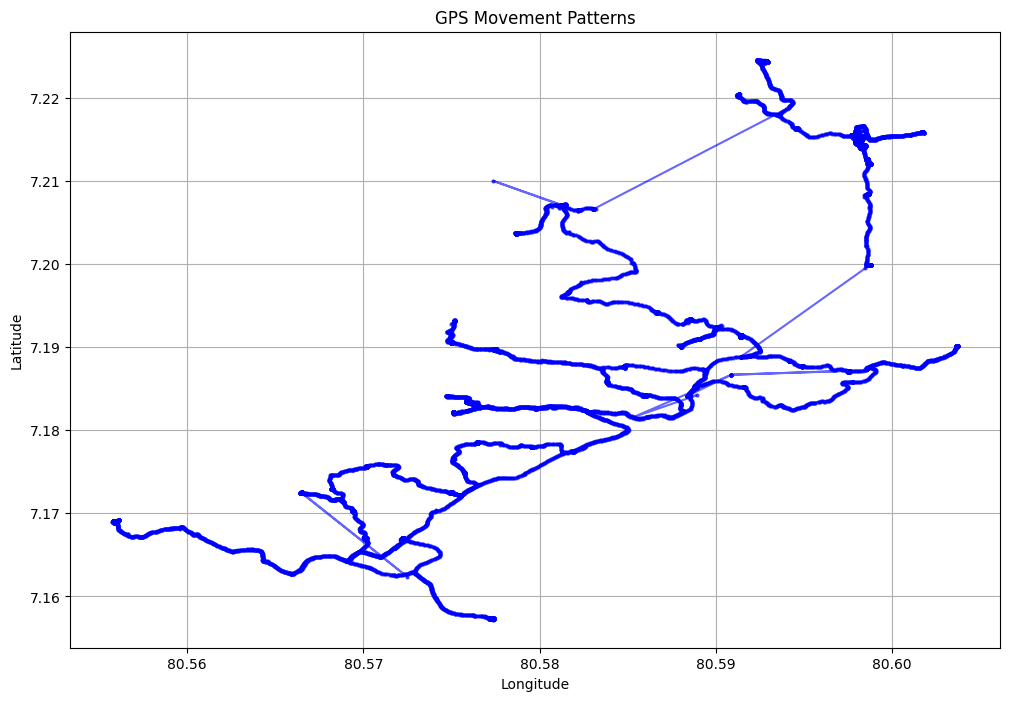

In [12]:
plt.figure(figsize=(12, 8))
plt.plot(gps_data['Longitude'], gps_data['Latitude'], marker='o', markersize=2, linestyle='-', color='b', alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GPS Movement Patterns')
plt.grid(True)
plt.show()

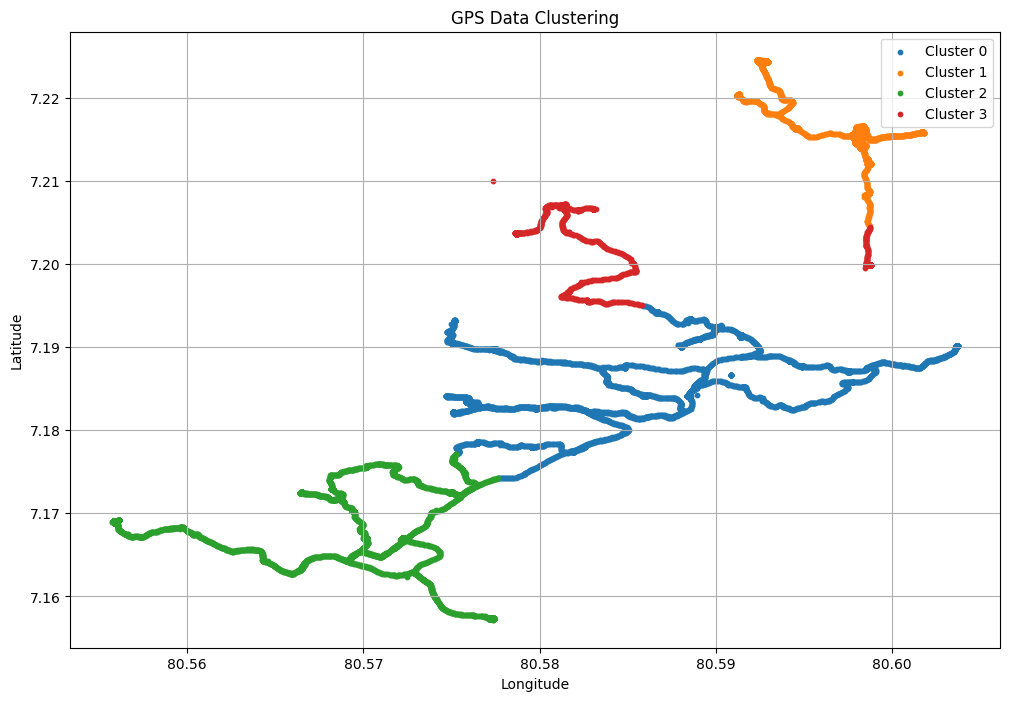

In [13]:
features = gps_data[['Longitude', 'Latitude']]
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
gps_data['Cluster'] = kmeans.fit_predict(features)

# Plot the clustered data
plt.figure(figsize=(12, 8))
for cluster in range(num_clusters):
    clustered_data = gps_data[gps_data['Cluster'] == cluster]
    plt.scatter(clustered_data['Longitude'], clustered_data['Latitude'], s=10, label=f'Cluster {cluster}')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GPS Data Clustering')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
# Function to calculate Haversine distance
def haversine(lon1, lat1, lon2, lat2):
    R = 6371.0  # Radius of the Earth in km
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

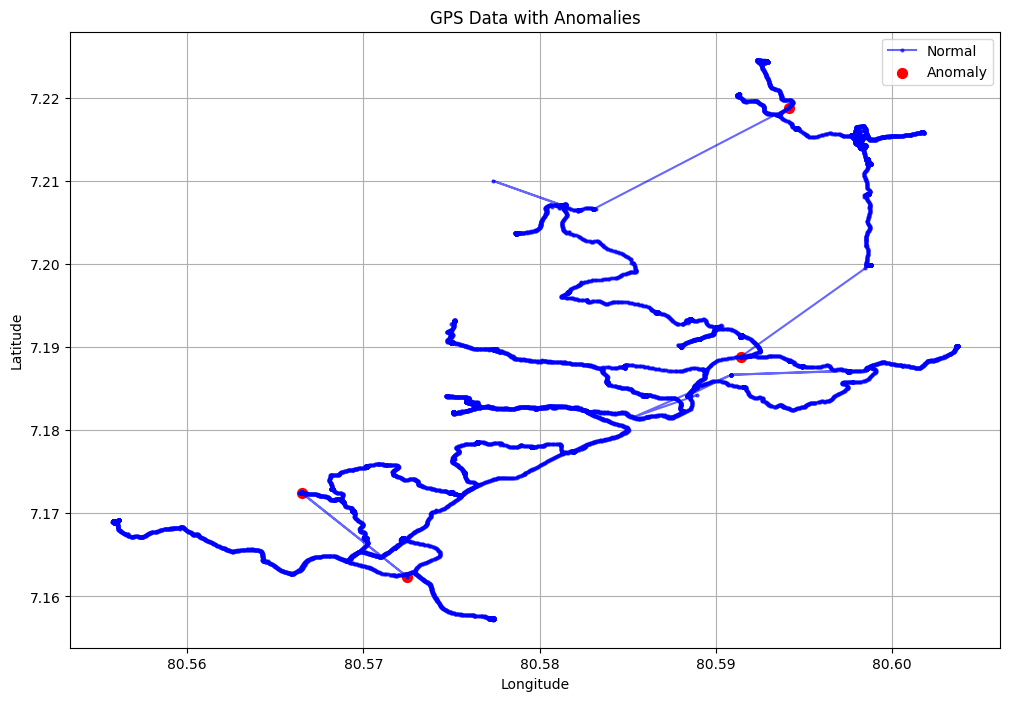

       Longitude  Latitude  Accuracy      TimeStamp       Date  \
5860    80.56649   7.17251     1.900  1695700026000 2023-09-26   
5861    80.57249   7.16236  1399.999  1695700026637 2023-09-26   
15182   80.59142   7.18887     1.300  1695709648000 2023-09-26   
25038   80.59414   7.21886     2.100  1695727134000 2023-09-26   

                     DateTime  IsGPSOn  BatLevel Provider  Bearing  ...  \
5860  2023-09-26 03:47:06.000     True        92      gps   293.96  ...   
5861  2023-09-26 03:47:06.637     True        92  network     0.00  ...   
15182 2023-09-26 06:27:28.000     True        77      gps   195.80  ...   
25038 2023-09-26 11:18:54.000     True        55      gps   193.99  ...   

      Distance_km  Anomaly  Hour  Time_Diff    Speed_kmh  DBSCAN_Cluster  \
5860     1.308430     True     3      0.637  7394.579074               0   
5861     1.306113     True     3      1.474  3189.964097               0   
15182    1.474316     True     6   6413.000     0.827622         

In [30]:
# Calculate distances between consecutive points
gps_data['Next_Longitude'] = gps_data['Longitude'].shift(-1)
gps_data['Next_Latitude'] = gps_data['Latitude'].shift(-1)
gps_data['Distance_km'] = gps_data.apply(lambda row: haversine(row['Longitude'], row['Latitude'], row['Next_Longitude'], row['Next_Latitude']), axis=1)

# Identify anomalies (e.g., distance > 1 km in a short time interval)
distance_threshold = 1.0  # 1 km
gps_data['Anomaly'] = gps_data['Distance_km'] > distance_threshold

# Plot the anomalies
plt.figure(figsize=(12, 8))
plt.plot(gps_data['Longitude'], gps_data['Latitude'], marker='o', markersize=2, linestyle='-', color='b', alpha=0.6, label='Normal')
plt.scatter(gps_data[gps_data['Anomaly']]['Longitude'], gps_data[gps_data['Anomaly']]['Latitude'], color='r', s=50, label='Anomaly')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GPS Data with Anomalies')
plt.legend()
plt.grid(True)
plt.show()

# Display the anomalies in a table
anomalies = gps_data[gps_data['Anomaly']]
print(anomalies.head())

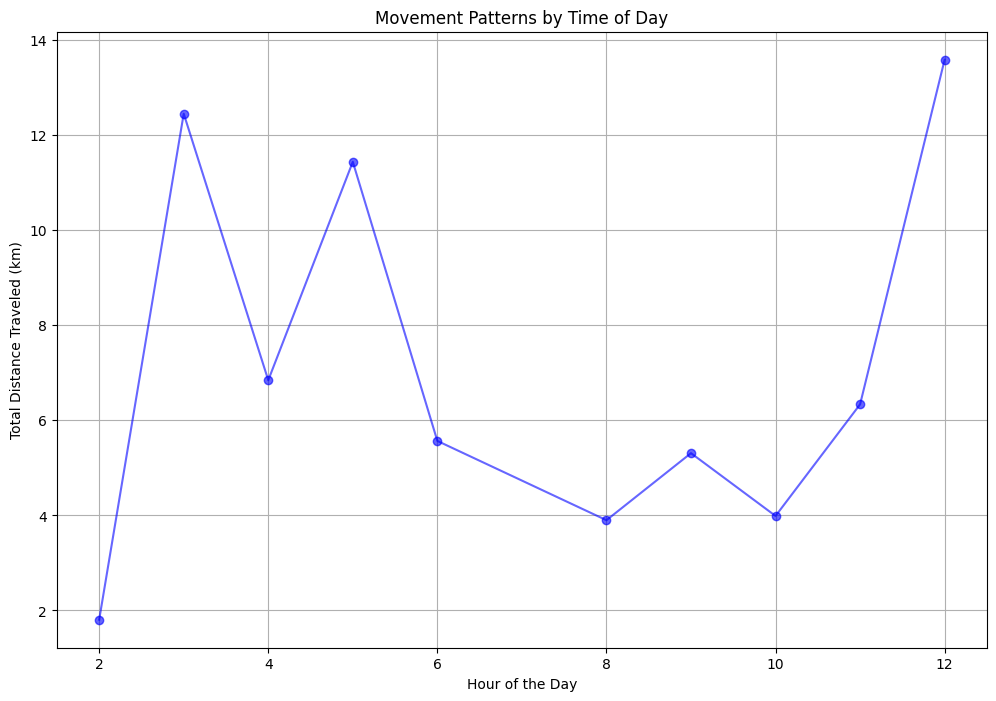

In [16]:
# Calculate distances using the Haversine formula
gps_data['Next_Longitude'] = gps_data['Longitude'].shift(-1)
gps_data['Next_Latitude'] = gps_data['Latitude'].shift(-1)
gps_data['Distance_km'] = gps_data.apply(lambda row: haversine(row['Longitude'], row['Latitude'], row['Next_Longitude'], row['Next_Latitude']), axis=1)

# Extract hour information
gps_data['Hour'] = gps_data['DateTime'].dt.hour

# Aggregate data by hour
hourly_data = gps_data.groupby('Hour').agg({'Distance_km': 'sum'}).reset_index()

# Plot the hourly distance traveled
plt.figure(figsize=(12, 8))
plt.plot(hourly_data['Hour'], hourly_data['Distance_km'], marker='o', linestyle='-', color='b', alpha=0.6)
plt.xlabel('Hour of the Day')
plt.ylabel('Total Distance Traveled (km)')
plt.title('Movement Patterns by Time of Day')
plt.grid(True)
plt.show()

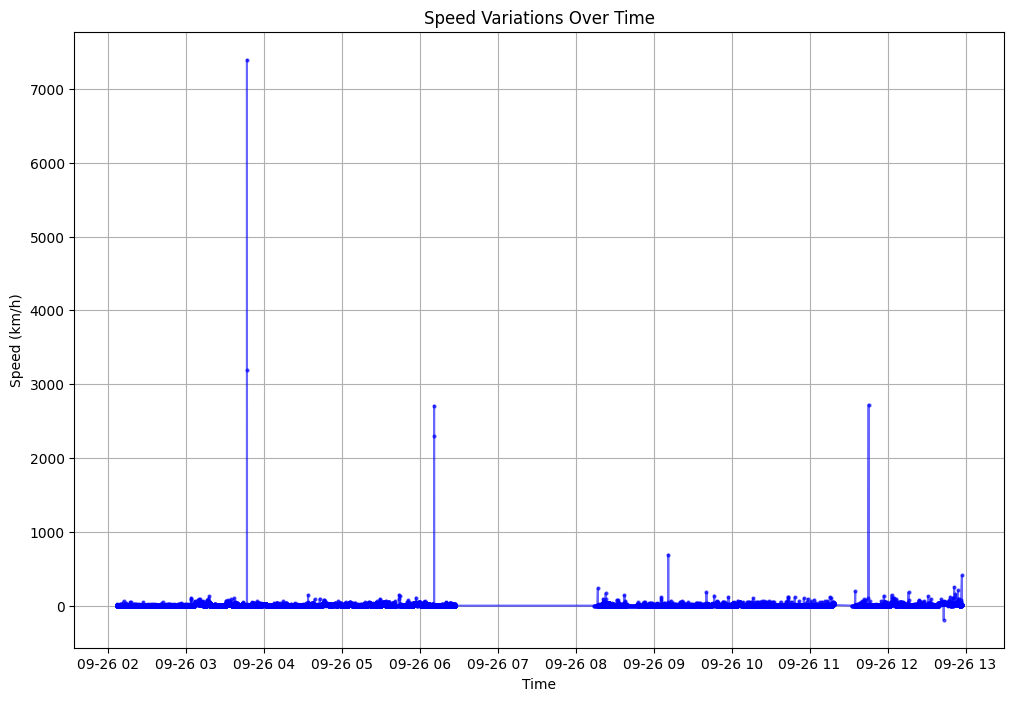

In [17]:
# Calculate distances and time differences
gps_data['Next_Longitude'] = gps_data['Longitude'].shift(-1)
gps_data['Next_Latitude'] = gps_data['Latitude'].shift(-1)
gps_data['Distance_km'] = gps_data.apply(lambda row: haversine(row['Longitude'], row['Latitude'], row['Next_Longitude'], row['Next_Latitude']), axis=1)
gps_data['Time_Diff'] = (gps_data['DateTime'].shift(-1) - gps_data['DateTime']).dt.total_seconds()

# Calculate speed in km/h
gps_data['Speed_kmh'] = gps_data['Distance_km'] / (gps_data['Time_Diff'] / 3600)

# Drop rows with NaN values
gps_data.dropna(subset=['Speed_kmh'], inplace=True)

# Plot speed variations over time
plt.figure(figsize=(12, 8))
plt.plot(gps_data['DateTime'], gps_data['Speed_kmh'], marker='o', markersize=2, linestyle='-', color='b', alpha=0.6)
plt.xlabel('Time')
plt.ylabel('Speed (km/h)')
plt.title('Speed Variations Over Time')
plt.grid(True)
plt.show()

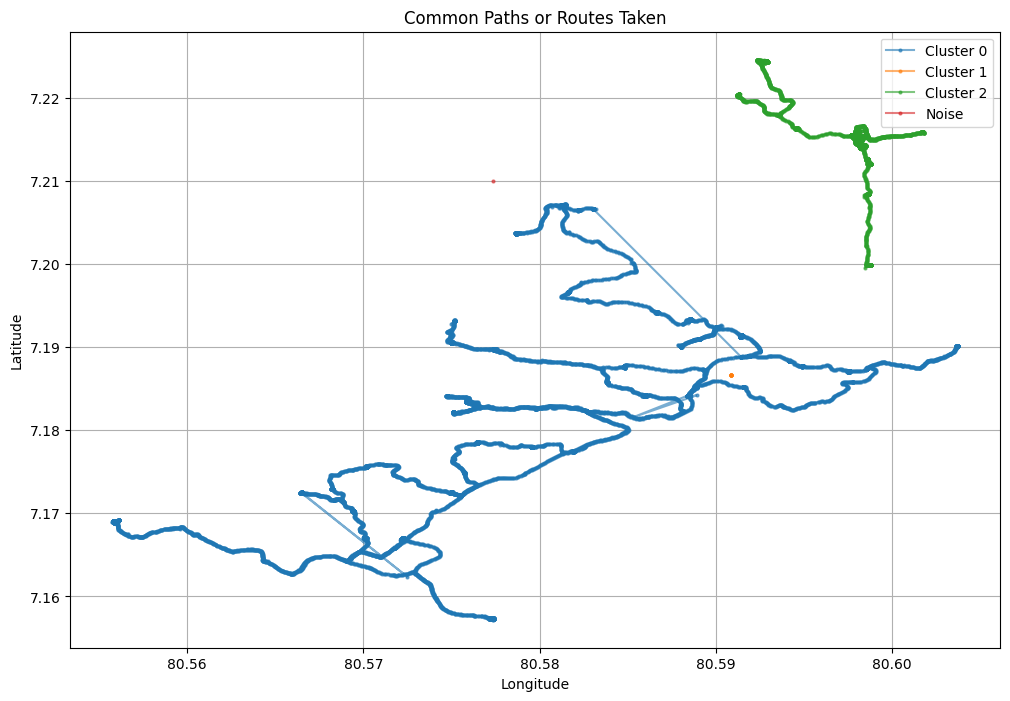

In [18]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


# Extract relevant features for clustering
features = gps_data[['Longitude', 'Latitude']]

# Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.0005, min_samples=10)
gps_data['DBSCAN_Cluster'] = dbscan.fit_predict(features)


plt.figure(figsize=(12, 8))
unique_clusters = gps_data['DBSCAN_Cluster'].unique()
for cluster in unique_clusters:
    if cluster == -1:  # Noise
        color = 'k'
        label = 'Noise'
    else:
        color = None
        label = f'Cluster {cluster}'
    clustered_data = gps_data[gps_data['DBSCAN_Cluster'] == cluster]
    plt.plot(clustered_data['Longitude'], clustered_data['Latitude'], marker='o', markersize=2, linestyle='-', label=label, alpha=0.6)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Common Paths or Routes Taken')
plt.legend()
plt.grid(True)
plt.show()


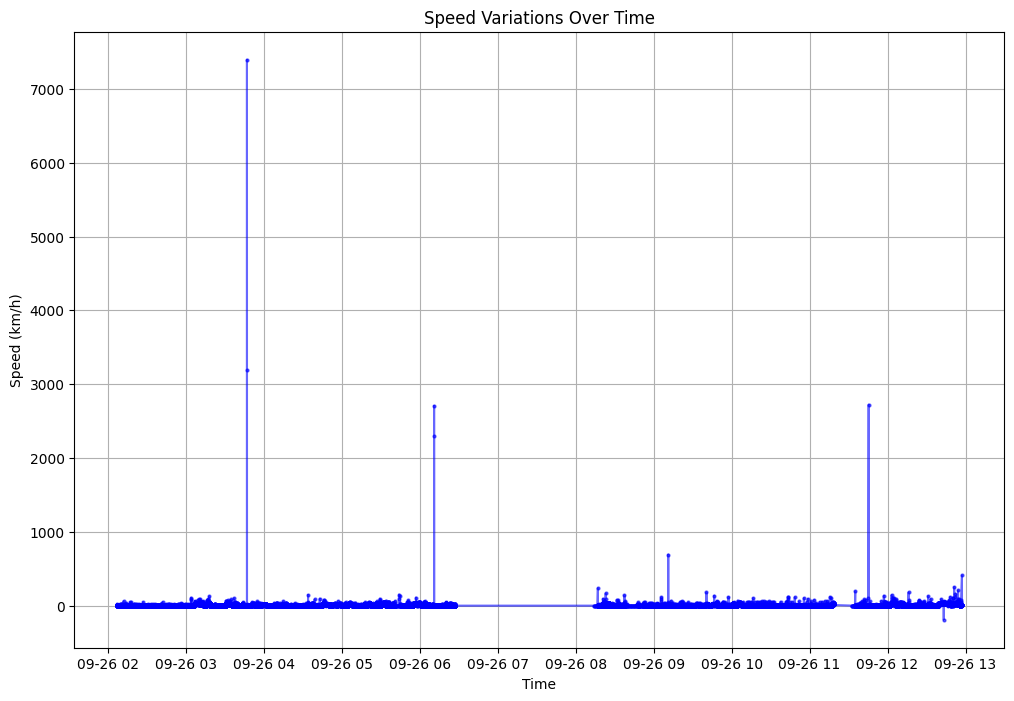

In [19]:
# Ensure the 'TimeStamp' column is in datetime format
gps_data['DateTime'] = pd.to_datetime(gps_data['TimeStamp'], unit='ms')

# Calculate time difference in seconds
gps_data['Next_DateTime'] = gps_data['DateTime'].shift(-1)
gps_data['Time_Diff'] = (gps_data['Next_DateTime'] - gps_data['DateTime']).dt.total_seconds()

# Calculate distances using the Haversine formula
gps_data['Next_Longitude'] = gps_data['Longitude'].shift(-1)
gps_data['Next_Latitude'] = gps_data['Latitude'].shift(-1)
gps_data['Distance_km'] = gps_data.apply(lambda row: haversine(row['Longitude'], row['Latitude'], row['Next_Longitude'], row['Next_Latitude']), axis=1)

# Calculate speed in km/h
gps_data['Speed_kmh'] = (gps_data['Distance_km'] / gps_data['Time_Diff']) * 3600

# Remove infinite values and NaNs that might result from division by zero or missing data
gps_data.replace([np.inf, -np.inf], np.nan, inplace=True)
gps_data.dropna(subset=['Speed_kmh'], inplace=True)

# Plot the speed variations
plt.figure(figsize=(12, 8))
plt.plot(gps_data['DateTime'], gps_data['Speed_kmh'], marker='o', markersize=2, linestyle='-', color='b', alpha=0.6)
plt.xlabel('Time')
plt.ylabel('Speed (km/h)')
plt.title('Speed Variations Over Time')
plt.grid(True)
plt.show()


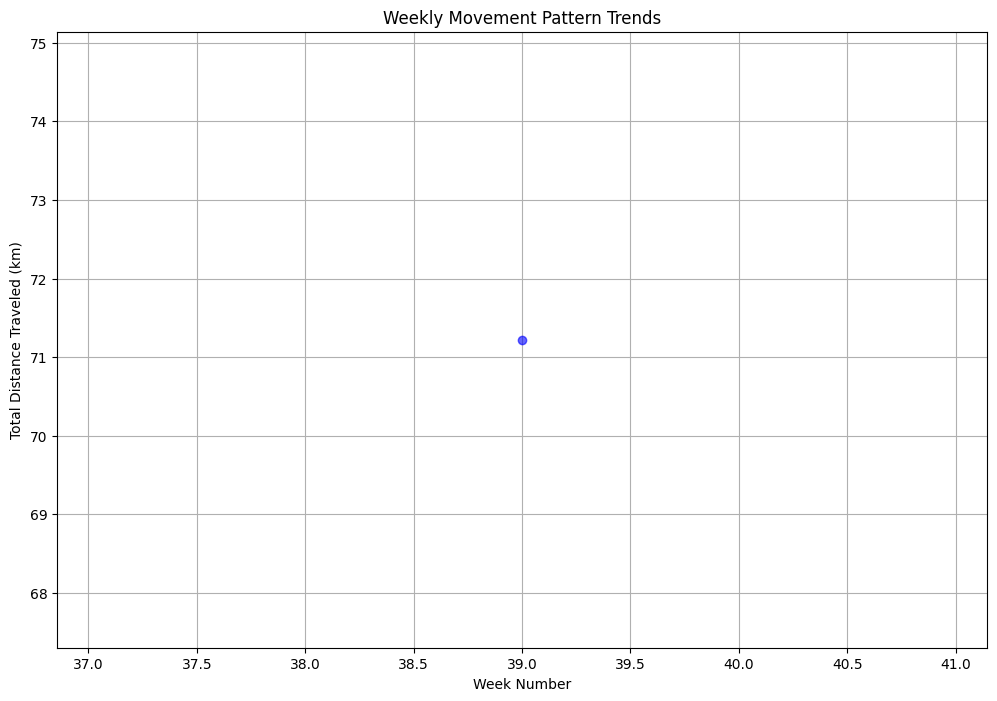

In [20]:
# Extract week number and year
gps_data['Week'] = gps_data['DateTime'].dt.isocalendar().week
gps_data['Year'] = gps_data['DateTime'].dt.isocalendar().year

# Function to calculate Haversine distance
def haversine(lon1, lat1, lon2, lat2):
    R = 6371.0  # Radius of the Earth in km
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

# Calculate distances using the Haversine formula
gps_data['Next_Longitude'] = gps_data['Longitude'].shift(-1)
gps_data['Next_Latitude'] = gps_data['Latitude'].shift(-1)
gps_data['Distance_km'] = gps_data.apply(lambda row: haversine(row['Longitude'], row['Latitude'], row['Next_Longitude'], row['Next_Latitude']), axis=1)

# Aggregate data by week
weekly_data = gps_data.groupby(['Year', 'Week']).agg({'Distance_km': 'sum'}).reset_index()

# Plot the weekly distance traveled
plt.figure(figsize=(12, 8))
plt.plot(weekly_data['Week'], weekly_data['Distance_km'], marker='o', linestyle='-', color='b', alpha=0.6)
plt.xlabel('Week Number')
plt.ylabel('Total Distance Traveled (km)')
plt.title('Weekly Movement Pattern Trends')
plt.grid(True)
plt.show()

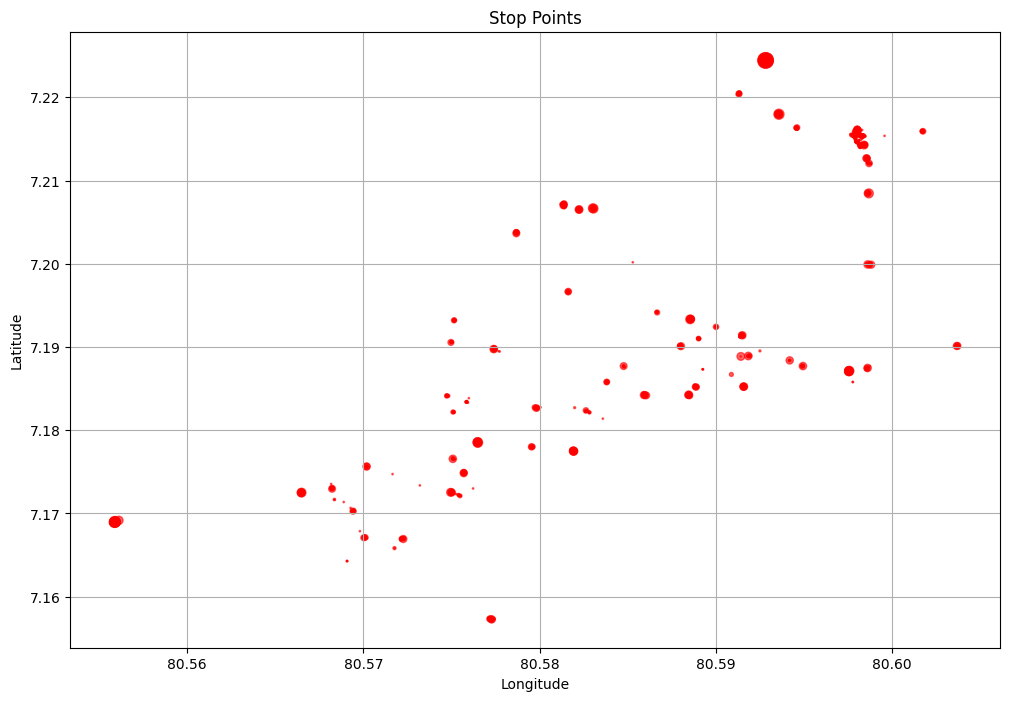

In [22]:
# Define a threshold for considering a stop (e.g., speed < 1 km/h)
stop_threshold = 1.0
gps_data['Is_Stop'] = gps_data['Speed_kmh'] < stop_threshold

# Aggregate data to find stop points
stop_points = gps_data[gps_data['Is_Stop']].groupby(['Longitude', 'Latitude']).size().reset_index(name='Stop_Count')

# Plot the stop points
plt.figure(figsize=(12, 8))
plt.scatter(stop_points['Longitude'], stop_points['Latitude'], s=stop_points['Stop_Count']*2, color='r', alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Stop Points')
plt.grid(True)
plt.show()


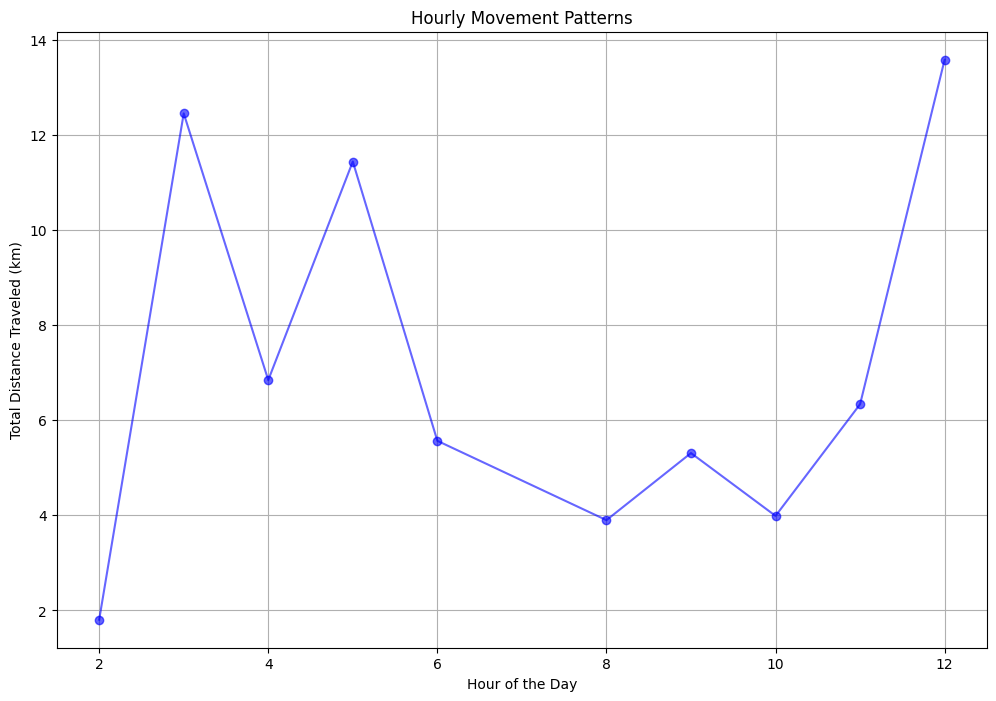

In [26]:
# Extract hour information
gps_data['Hour'] = gps_data['DateTime'].dt.hour

# Aggregate data by hour
hourly_data = gps_data.groupby('Hour').agg({'Distance_km': 'sum'}).reset_index()

# Plot the hourly distance traveled
plt.figure(figsize=(12, 8))
plt.plot(hourly_data['Hour'], hourly_data['Distance_km'], marker='o', linestyle='-', color='b', alpha=0.6)
plt.xlabel('Hour of the Day')
plt.ylabel('Total Distance Traveled (km)')
plt.title('Hourly Movement Patterns')
plt.grid(True)
plt.show()


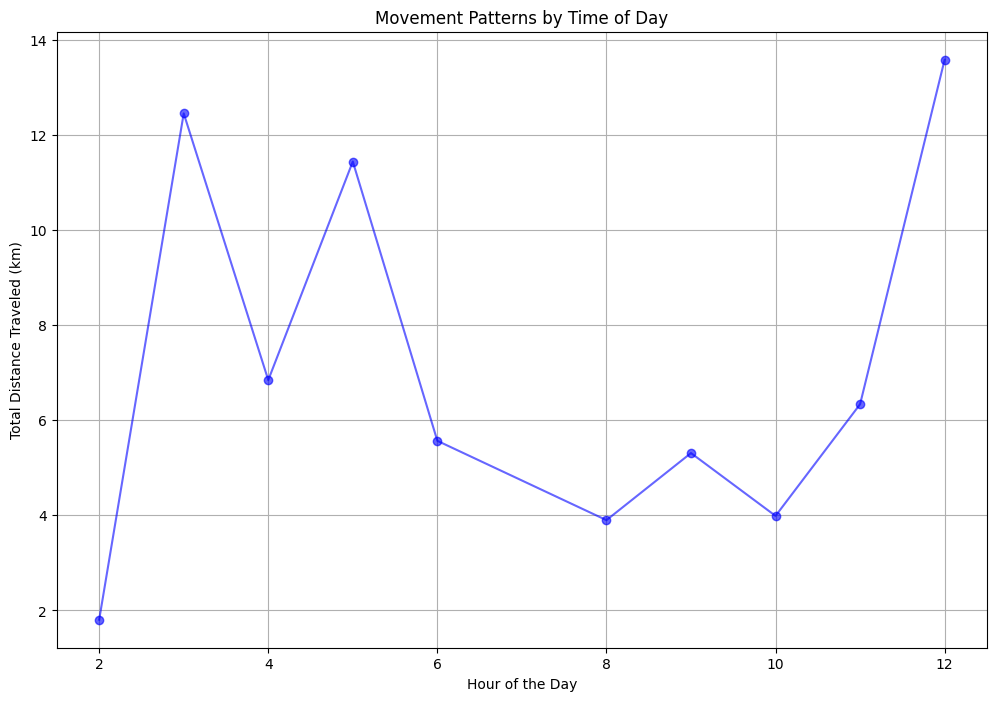

In [25]:
# Ensure the 'TimeStamp' column is in datetime format
gps_data['DateTime'] = pd.to_datetime(gps_data['TimeStamp'], unit='ms')

# Function to calculate Haversine distance
def haversine(lon1, lat1, lon2, lat2):
    R = 6371.0  # Radius of the Earth in km
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

# Calculate distances using the Haversine formula
gps_data['Next_Longitude'] = gps_data['Longitude'].shift(-1)
gps_data['Next_Latitude'] = gps_data['Latitude'].shift(-1)
gps_data['Distance_km'] = gps_data.apply(lambda row: haversine(row['Longitude'], row['Latitude'], row['Next_Longitude'], row['Next_Latitude']), axis=1)

# Extract hour information
gps_data['Hour'] = gps_data['DateTime'].dt.hour

# Aggregate data by hour
hourly_data = gps_data.groupby('Hour').agg({'Distance_km': 'sum'}).reset_index()

# Plot the hourly distance traveled
plt.figure(figsize=(12, 8))
plt.plot(hourly_data['Hour'], hourly_data['Distance_km'], marker='o', linestyle='-', color='b', alpha=0.6)
plt.xlabel('Hour of the Day')
plt.ylabel('Total Distance Traveled (km)')
plt.title('Movement Patterns by Time of Day')
plt.grid(True)
plt.show()


   Hour  Distance_km
9    12    13.580574
1     3    12.452028
3     5    11.439490
2     4     6.844253
8    11     6.336801


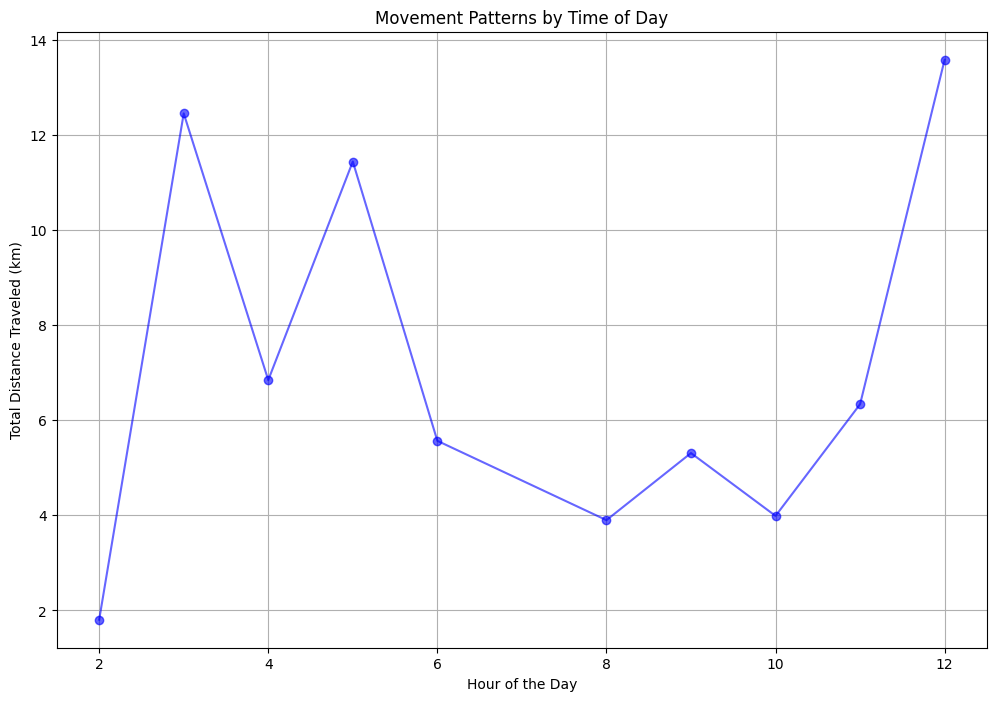

In [24]:
# Ensure the 'TimeStamp' column is in datetime format
gps_data['DateTime'] = pd.to_datetime(gps_data['TimeStamp'], unit='ms')

# Function to calculate Haversine distance
def haversine(lon1, lat1, lon2, lat2):
    R = 6371.0  # Radius of the Earth in km
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

# Calculate distances using the Haversine formula
gps_data['Next_Longitude'] = gps_data['Longitude'].shift(-1)
gps_data['Next_Latitude'] = gps_data['Latitude'].shift(-1)
gps_data['Distance_km'] = gps_data.apply(lambda row: haversine(row['Longitude'], row['Latitude'], row['Next_Longitude'], row['Next_Latitude']), axis=1)

# Extract hour information
gps_data['Hour'] = gps_data['DateTime'].dt.hour

# Aggregate data by hour
hourly_data = gps_data.groupby('Hour').agg({'Distance_km': 'sum'}).reset_index()

# Sort by distance to identify busiest hours
busiest_hours = hourly_data.sort_values(by='Distance_km', ascending=False)

# Display the top busiest hours
print(busiest_hours.head())

# Plot the hourly distance traveled
plt.figure(figsize=(12, 8))
plt.plot(hourly_data['Hour'], hourly_data['Distance_km'], marker='o', linestyle='-', color='b', alpha=0.6)
plt.xlabel('Hour of the Day')
plt.ylabel('Total Distance Traveled (km)')
plt.title('Movement Patterns by Time of Day')
plt.grid(True)
plt.show()


In [74]:
gps_data[['DateTime']]

,DateTime
0,2023-09-26 02:06:52.000
1,2023-09-26 02:07:05.000
2,2023-09-26 02:07:07.676
3,2023-09-26 02:07:08.176
4,2023-09-26 02:07:09.000
...,...
166586,2023-09-26 12:57:18.762
166587,2023-09-26 12:57:19.757
166588,2023-09-26 12:57:20.757
166589,2023-09-26 12:57:21.757
